One of things that R is used for is to perform simple testing and power calculations using *canned* functions. These functions are very simple to run; beign able to use and interpret them correctly is the hard part.

Set random see
----

In [86]:
set.seed(123)

Hypohesis testing
----

Need some explanation and disclaimers here!

### Example: Comparing group means

#### The t-test

In [87]:
x <- rnorm(mean=5.5, sd=1.5, n=10)
y <- rnorm(mean=5, sd=1.5, n=10)
result <- t.test(x, y, alternative = "two.sided", paired = FALSE,  var.equal = TRUE)
result


	Two Sample t-test

data:  x and y
t = 0.4472, df = 18, p-value = 0.6601
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.105854  1.703865
sample estimates:
mean of x mean of y 
 5.611938  5.312933 


### What is going on and what does all this actually mean?

The variable `result` is a list (similar to a hashmap or dictionary in other languages), and named parts can be extracte with the `$` method - e.g. `result$p.value` gives the p-value. 

The test firs cacluates a number called a $t$ statistic that is given by some function of the data. From theoretical anaysis, we know that if the null hypothesis and assumptions of equal vairance and normal distributiono of the data are correct, then the $t$ random variable will have a $t$ distribution with 18 degrees of freedom (20 data points minus 2 estimated means).

The formula fot calcualting the $t$-statitic is 

$$
t = \frac{(\bar{x_1} - \bar{x_2})}{\text{se}}
$$

where $\bar{x_1}$ and $\bar{x_2}$ are the sample means, and se (standard error) is

$$
\text{se} = \sqrt{s_1^2/n_1 + s_2^2/n_2}
$$

where $s_1^2$ and $s_2^2$ are the sample variances.

We will calculate all these values to show what goes on in the sausage factory.

In [93]:
# These are custom R functions. We will show you how to write your own in a later session.

se <- function(x1, x2) {
    n1 <- length(x1)
    n2 <- length(x2)
    v1 <- var(x1)
    v2 <- var(x2)
    sqrt(v1/n1 + v2/n2)
    }

In [89]:
t <- function(x1, x2) {
    (mean(x1) - mean(x2))/se(x1, x2)
    }

In [90]:
t(x, y)

[1] 0.447153

Now we will make use of our knowledge of probability distributions to understan what the p-value is.

We will plot the PDF of the t-distribution with df=18. The x-axis is the value of the t-statistic and the y-axis is the density (you can think of the density as the height of a histogram with total area normalized to sum to 1). The red lines are at the 2.5th and 97.5th quantiles - so for a two-sided test, the t-statistic must be more extreme than these two red lines (i.e. to the right of the 97.5th quantile or to the left of the 2.5th quantile) to reject the null hypothesis. We sse that our $t$ statisitc (and its symmeetric negative) in dashed green do not meet this requirement - hence the p-value is > 0.05. 

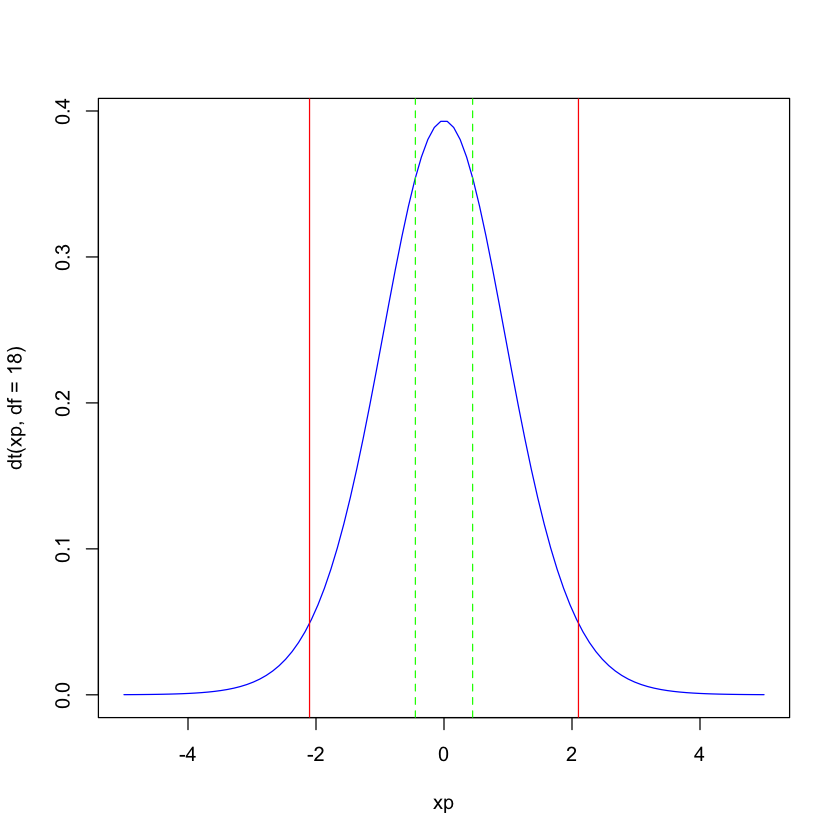

In [92]:
xp <- seq(-5, 5, length.out = 100)
plot(xp, dt(xp, df=18), type="l", col="blue")
score <- t(x, y)
abline(v=c(score, -score), col="green", lty=2)
thresholds <- c(qt(0.025, df=18), qt(0.975, df=18))
abline(v=thresholds, col="red", lty=1)

The p-value is the areau under the curve more extreme than the green lines. Since the t-statisic is positive, we can find the area to its right as one minus the cumulative density up to the value of the t-statitic. Doubling this (why?) gives us the p-value.

In [95]:
2*(1 - pt(score, df=18))

[1] 0.6600985

Note that this agrees with the value given by `t.test`.

#### The ranksum test

This calculates a test statistic $W$ that is the sum of the outcomes for all pairwise comparisons of the ranks of the values in $x$ and $y$. Outcomes are 1 if the first item > the second item, 0.5 for a tie and 0 otherwise. This can be simplified to the follwoing formula

$$
W = R_1 - \frac{n_1(n_1 + 1)}{2}
$$

where $R_1$ is the sum of ranks for the values in $x$. For large samples, $W$ can be considered to come from the normal distribution with means aand standard deviations that can be calculated from the data (look up by Googling or any mathematical statitics textbook if interested). 

In [100]:
wilcox.test(x, y)


	Wilcoxon rank sum test

data:  x and y
W = 53, p-value = 0.8534
alternative hypothesis: true location shift is not equal to 0


Explicit calculation of statistic
----

In [120]:
w <- function(x, y) {
    r <- rank(c(x, y))
    nx <- length(x)
    sum(r[1:nx]) - nx*(nx+1)/2
    }

In [121]:
w(x, y)

[1] 53

### Effect of sample size

In [4]:
x <- rnorm(mean=5.5, sd=1.5, n=200)
y <- rnorm(mean=5, sd=1.5, n=200)
t.test(x, y, )


	Welch Two Sample t-test

data:  x and y
t = 3.1236, df = 397.539, p-value = 0.001917
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1676522 0.7370648
sample estimates:
mean of x mean of y 
 5.474823  5.022465 


In [5]:
wilcox.test(x, y)


	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 23106, p-value = 0.007229
alternative hypothesis: true location shift is not equal to 0


Work!
----

Supppose we measure the weights of 100 people before and after a marathon. We want to know if there is a difference. What is the p-value for an appropirate parametric and non-parametric test?

In [20]:
before <- rnorm(n=100, mean=165, sd=25)
change <- rnorm(n=100, mean=-5, sd=10)
after <- before + change

In [ ]:
# Parametric test





In [ ]:
# Non-parametric test





### Example: Comparing proportions

In [6]:
size = 50
x <- rbinom(n=1, prob=0.3, size=size)
y <- rbinom(n=1, prob=0.35, size=size)

In [7]:
(m <- matrix(c(x, y, size-x, size-y), ncol = 2))

21,29
20,30


In [8]:
prop.test(m)


	2-sample test for equality of proportions with continuity correction

data:  m
X-squared = 0, df = 1, p-value = 1
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1927553  0.2327553
sample estimates:
prop 1 prop 2 
  0.42   0.40 


#### Effect of sample size

In [9]:
size <- 500
x <- rbinom(n=1, prob=0.3, size=size)
y <- rbinom(n=1, prob=0.35, size=size)

In [10]:
(m <- matrix(c(x, y, size-x, size-y), ncol = 2))

132,368
188,312


#### Test that proportions are equal using z-score (prop.test)

In [11]:
prop.test(m)


	2-sample test for equality of proportions with continuity correction

data:  m
X-squared = 13.9017, df = 1, p-value = 0.0001926
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.17140574 -0.05259426
sample estimates:
prop 1 prop 2 
 0.264  0.376 


#### Alternative using $\chi^2$ test

In [12]:
chisq.test(m)


	Pearson's Chi-squared test with Yates' continuity correction

data:  m
X-squared = 13.9017, df = 1, p-value = 0.0001926


Work!
----

You find 3 circulating DNA fragments with the following properties

- fragment 1 has length 100 and is 35% CG
- fragment 2 has length 110 and is 40% CG
- fragment 3 has length 120 and is 50% GC

Do you reject the null hypotheses that the percent GC content is the same for all 3 fraemnets?

Sample size calculations
----

Need some explanation and disclaimers here!

See [Qucik-R Power](http://www.statmethods.net/stats/power.html) for more examples and more detailed explanation of function parameters.

In [13]:
install.packages("pwr", repos = "http://cran.r-project.org")


The downloaded binary packages are in
	/var/folders/xf/rzdg30ps11g93j3w0h589q780000gn/T//RtmpHT9QtQ/downloaded_packages


In [14]:
library(pwr)

Warning message:
: package ‘pwr’ was built under R version 3.1.3

For simple power calculations, you need 3 out of 4 of the follwoing:
- n = number of samples / experimental units
- sig.level = what "p-value" you will be using to determine significance
- power = fraction of experiments that will reject null hypothesis
- d = "effect size" ~ depends on context

In [15]:
d <- (5.5 - 5.0)/1.5
pwr.t.test(d = d, sig.level = 0.05, power = 0.8)


     Two-sample t test power calculation 

              n = 142.2462
              d = 0.3333333
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [16]:
p1 = 0.30
p2 = 0.35
(h = abs(2*asin(p1) - 2*asin(p2)))

pwr.2p.test(h = h, sig.level = 0.05, power = 0.9)

[1] 0.1057569


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1057569
              n = 1878.922
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: same sample sizes


### Check our understanding of what power means

Note: The code below is the first example of a statistical *simulation*. It can be made more efficient by vectorization, but looping is initially easer to understand and the speed makes no practical differnece for such a small exmaple.

Before running the code - try to answer this question:

> If we performed the same experiment 1000 times with n=1879 (from power calucations above), how many epxerients would yield a p-value of less than 0.05?

In [17]:
size <- 1879
hits <- 0
ntrials <- 1000
for (i in 1:ntrials) {
    x <- rbinom(n=1, prob=0.3, size=size)
    y <- rbinom(n=1, prob=0.35, size=size)
    m <- matrix(c(x, y, size-x, size-y), ncol = 2)
    result <- prop.test(m)
    hits <- hits + (result$p.value < 0.05)
    }
hits/ntrials

[1] 0.886

Work
----

Suppose an investigator proposes to use an unpaired t-test to examine differences between two groups of size 13 and 16. What is the power at the usual 0.05 significance level for effet sizes of 0.1, 0.5 and 1.0.